# 多層感知器-MLP
 * Python 3.6
 * tensorflow 1.8.0 / keras 2.1.5 / protobuf 3.5.2.post1

In [33]:
import keras
from keras.datasets.mnist import load_data
# ((訓練題目,訓練答案),(測試題目,測試答案))
(x_train,y_train),(x_test,y_test)=load_data()

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


ANS: 7


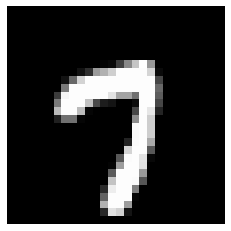

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0,59999)
print('ANS:',y_train[c])
plt.axis('off')
plt.imshow(x_train[c],cmap='gray')

In [57]:
pd.DataFrame(x_train[35781]).iloc[7,:]

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      5
13     10
14     63
15    136
16    197
17    255
18    151
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
Name: 7, dtype: uint8

In [55]:
np.matrix(x_train[35781][7])

matrix([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
          10,  63, 136, 197, 255, 151,   0,   0,   0,   0,   0,   0,   0,
           0,   0]], dtype=uint8)

In [54]:
import pandas as pd
pd.DataFrame(x_train[35781])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,151,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,18,...,213,10,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,19,104,212,...,253,70,0,0,0,0,0,0,0,0


## 資料預處理
  * 題目愈處理(Normalize)
  * Keras在準備隨機那組weights時跟Normalize後的圖片比較搭
  * 方法一: 0 ~ 1  方法二: -1 ~ 1
  * 攤開 > Keras MLP 規定一定要攤開成ID

In [16]:
x_train_shape = x_train.reshape(60000,784)/255
x_test_shape = x_test.reshape(10000,784)/255
#Demo
#x_train_shape[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 答案預處理(One Hot Encoding)
####  希望的樣子  :   [ p0 ,..., p9 ]


In [7]:
#y_train
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#Demo
print('原來',y_train[0])
print('後來',y_train_cat[0])

原來 5
後來 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 建立模型
 * 第一種:蛋糕支架(Sequential)，堆上一層(Layers)
 * [Keras dense](https://keras.io/api/layers/core_layers/dense/#dense-layer)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一層:input_dim ->有幾個輸入
# 724*128+128(bias)
mlp.add(Dense(128,activation='relu',input_dim=784))
# Param: 128*10(神經元的連結) + 10(bias)
mlp.add(Dense(10,activation='softmax'))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## [確定模型的訓練方式](https://keras.io/zh/models/sequential/)
  * 隨機(隨便選一組weight)梯度下架
  * loss -> 最後輸出一個:binary_crossentropy ; 輸出多個:categorical_crossentropy
  * optimizer -> 優化loss下降(結合速度、步長)

In [32]:
mlp.compile(loss='categorical_crossentropy',
            metrics=['accuracy'],
            optimizer='adam')

In [15]:
# batch批次: 看幾筆(100~200)做一次梯度下降
# epoch: 每一批跑幾次梯度下降 ???
# ex 60000筆 batch=200 epoch=10; 60000*10/200=3000(次梯度下降)
mlp.fit(x_train_shape,
        y_train_cat,
        batch_size=200,
        epochs=5,
        validation_split=0.1,
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 1s - loss: 0.0398 - acc: 0.9895 - val_loss: 0.0778 - val_acc: 0.9777
Epoch 2/5
 - 1s - loss: 0.0353 - acc: 0.9905 - val_loss: 0.0735 - val_acc: 0.9780
Epoch 3/5
 - 1s - loss: 0.0306 - acc: 0.9923 - val_loss: 0.0764 - val_acc: 0.9778
Epoch 4/5
 - 1s - loss: 0.0266 - acc: 0.9936 - val_loss: 0.0763 - val_acc: 0.9788
Epoch 5/5
 - 1s - loss: 0.0231 - acc: 0.9950 - val_loss: 0.0776 - val_acc: 0.9777


In [58]:
mlp.weights

[<tf.Variable 'dense_3/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_4/kernel:0' shape=(128, 10) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(10,) dtype=float32_ref>]

In [20]:
mlp.evaluate(x_test_shape,y_test_cat)

10000/10000 [==============================] - 0s 38us/step


[0.07095522577692755, 0.978]

In [25]:
#predict:機率 predict_classes:分類
pre=mlp.predict_classes(x_test_shape)
#confusion matrix (correct,predict)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre))

,0,1,2,3,4,5,6,7,8,9
0,969,0,1,2,1,1,1,0,2,3
1,0,1121,2,3,0,0,3,0,6,0
2,4,1,1009,2,1,0,2,8,5,0
3,0,0,1,997,0,2,0,3,3,4
4,0,0,4,1,955,0,3,2,1,16
5,2,1,0,16,1,859,5,1,4,3
6,3,2,1,1,4,3,941,0,3,0
7,0,4,6,3,2,0,0,1004,1,8
8,3,0,5,6,3,5,2,5,943,2
9,2,2,0,9,6,1,1,5,1,982


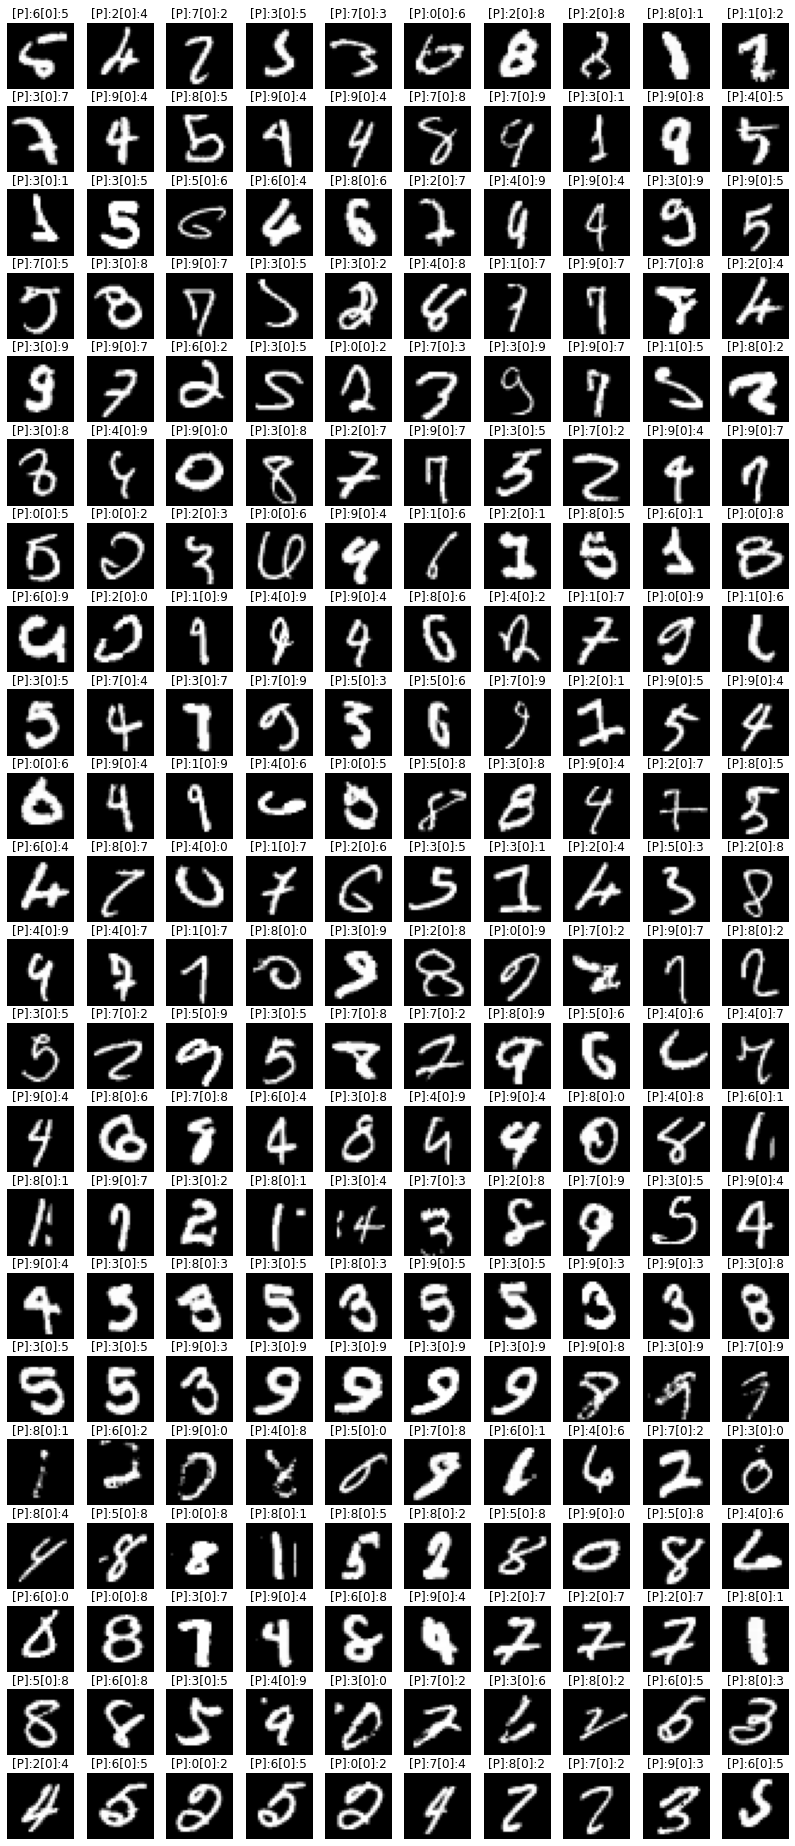

In [31]:
import numpy as np
diff=np.nonzero(pre != y_test)[0] #預測錯的東西
orifalse = y_test[diff]
prefalse = pre[diff]
imgfalse = x_test[diff]
plt.figure(figsize=(14,35))
width = 10
hight = int(len(imgfalse)/10)+1
for (i,img) in enumerate(imgflase):
    #(列數，行數，第幾張圖(i開始))
    plt.subplot(hight,width,i+1)
    plt.axis('off')
    t = '[P]:'+str(prefalse[i])+'[0]:'+str(orifalse[i])
    plt.title(t)
    plt.imshow(img,cmap='gray')